<a href="https://colab.research.google.com/github/MedAziz218/Interpolation-numerique/blob/main/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Header
import numpy as np
import numpy.linalg as alg
from matplotlib import pyplot as plt



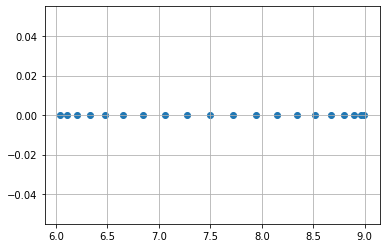

In [155]:
def equidistant_points(a,b,n):
    assert a < b
    return np.linspace(a,b,n)
def tchebychev_points(a,b,n):
    assert a < b
    l = []
    for k in range(n):
        xk = np.cos((2*k+1)*np.pi/(2*(n+1)))
        l.append(xk)
    return ((np.array(l)+1)/2)*(b-a)+a
xs = tchebychev_points(6,9,20)
plt.grid()
plt.scatter(xs,np.zeros(xs.size))
plt.show()

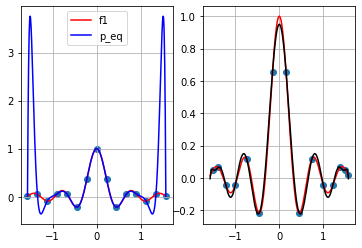

In [152]:
## methode directe


def methode_directe(f, xs:np.array):
    ys = f(xs)
    van = np.vander(xs,n)
    sol = alg.solve(van,ys)
    sol = sol[::-1] # polynome coefficents

    def p(x):
        return sum([(x**i)*sol[i] for i in range(n)])
    p = np.vectorize(p)
    return p
pi = np.pi
a,b = -pi/2,pi/2
n = 15
f = lambda x: np.sinc(x*np.pi)

# plotting the graph
fxs = np.linspace(a,b,500)




plt.subplot(1,2,1)
xs = equidistant_points(a,b,n)
p_eq = methode_directe(f,xs)
plt.plot(fxs,f(fxs),label = 'f1',c='r')
plt.plot(fxs,p_eq(fxs),label = 'p_eq',c='b')
plt.scatter(xs,f(xs))
plt.legend();plt.grid();


plt.subplot(1,2,2)
xs = tchebychev_points(a,b,n)
plt.plot(fxs,f(fxs),label = 'f1',c='r')
p_tcheby =  methode_directe(f,xs)
plt.plot(fxs,p_tcheby(fxs),label = 'p_tcheby',c='black')
plt.scatter(xs,f(xs))
plt.grid();




plt.show()
